***Task-3***

In [1]:
import os, sys
import numpy as np               # for handling arrays
import pandas as pd
import h5py as h5                # for reading the COMPAS data
import time                      # for finding computation time
import shutil
import matplotlib.pyplot as plt  #for plotting
#plt.rcParams["text.usetex"] = True
compasRootDir = os.environ['COMPAS_ROOT_DIR']
sys.path.append(compasRootDir + 'postProcessing/PythonScripts')
from unsupported_utils.compasUtils import printCompasDetails,getEventHistory, getEventStrings 

sys.path.append(os.path.join('pyblish','plots'))
plt.rcParams['figure.figsize'] = (12,6)
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Computer Modern Roman"],
    "text.latex.preamble": r"\usepackage{amsmath}",
    "font.size": 16,  # Set the default font size
    "axes.titlesize": 18,  # Set the font size of the title
    "axes.labelsize": 18,  # Set the font size of the x and y labels
    "xtick.labelsize": 18,  # Set the font size of the x tick labels
    "ytick.labelsize": 18
})

***Task-3*** <br>

In [2]:
data3 = h5.File('Task-3/new-out.h5','r')

In [4]:
printCompasDetails(data3['BSE_Common_Envelopes'])

SEED,(units),1718633719,1718633721,1718633727,1718633729,1718633732,1718633733,1718633733,1718633735,1718633738,...,1718643700,1718643702,1718643705,1718643708,1718643709,1718643710,1718643711,1718643715,1718643717,1718643718
BE_Fixed(1),erg,0.000000e+00,2.235170e+49,0.000000,0.000000,0.000000e+00,1.191582e+49,0.000000,1.832426e+49,0.000000e+00,...,0.000000e+00,4.745192e+48,0.000000e+00,2.115653e+50,5.147851e+48,1.131342e+49,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
BE_Fixed(2),erg,2.187831e+48,0.000000e+00,0.000000,0.000000,2.286448e+49,3.225010e+49,0.000000,0.000000e+00,2.787848e+49,...,5.252255e+48,0.000000e+00,5.908317e+48,0.000000e+00,0.000000e+00,0.000000e+00,4.352555e+49,2.603615e+49,2.237347e+49,0.000000
BE_Kruckow(1),erg,0.000000e+00,8.996707e+48,0.000000,0.000000,0.000000e+00,3.931006e+48,0.000000,3.463782e+48,0.000000e+00,...,0.000000e+00,9.526070e+47,0.000000e+00,7.037810e+48,2.392693e+48,1.471059e+48,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
BE_Kruckow(2),erg,1.289177e+48,0.000000e+00,0.000000,0.000000,2.349101e+48,5.488610e+48,0.000000,0.000000e+00,3.657671e+48,...,4.716730e+47,0.000000e+00,1.723218e+48,0.000000e+00,0.000000e+00,0.000000e+00,1.604085e+49,2.509805e+48,1.638729e+48,0.000000
BE_Loveridge(1),erg,0.000000e+00,6.160274e+49,0.000000,0.000000,0.000000e+00,2.181454e+49,0.000000,1.436417e+49,0.000000e+00,...,0.000000e+00,1.055714e+48,0.000000e+00,4.401057e+49,1.456107e+48,3.776686e+48,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Teff<CE(1),K,5.866573e+04,4.751351e+03,15508.232468,23730.136865,2.402556e+04,4.295484e+03,89970.858076,4.505920e+03,3.455365e+04,...,1.388457e+04,3.919085e+03,3.027398e+04,1.718510e+04,3.676305e+03,4.304539e+03,3.615969e+03,5.030361e+04,1.891111e+04,19972.430516
Teff<CE(2),K,3.397309e+03,2.919117e+04,17369.469015,28897.788360,5.389333e+03,7.036242e+03,90138.438592,8.927413e+03,5.732342e+03,...,4.320802e+03,6.941990e+03,3.849920e+03,3.980216e+03,2.313173e+04,1.256554e+04,5.846190e+03,5.773578e+03,5.466358e+03,6846.898517
Time,Myr,4.419471e+01,7.500396e+00,24.768435,11.256570,1.069435e+02,1.347654e+01,13.867305,1.974180e+01,5.306279e+01,...,2.868020e+02,6.848942e+01,6.240914e+01,2.279789e+01,1.524757e+01,5.550125e+01,1.048677e+01,1.186225e+02,1.657577e+02,2.512643
Zeta_Lobe,-,1.557580e+01,1.522473e+00,0.128144,-0.220350,1.777253e+01,4.586397e-01,0.484489,1.148161e+01,1.623448e+01,...,3.937802e+00,7.897259e+00,1.525876e+01,3.699946e+01,1.418438e+00,3.035771e+00,7.639840e+00,1.897400e+01,1.294404e+01,8.097809


In [8]:
#finding total number of supernovae
seed_sn = data3['BSE_Supernovae']['SEED'][...].squeeze()
print('Total no. of supernovae: {} out of 10,000'.format(len(seed_sn)))
print('Fraction = ',(len(seed_sn)/10**4))

Total no. of supernovae: 5652 out of 10,000
Fraction =  0.5652


In [3]:
# Parts (1) and (2)
import csv
event_history=getEventHistory(h5.File('Task-3/new-out.h5','r'))
event_strings=getEventStrings(h5.File('Task-3/new-out.h5','r'))
binary_no_interaction,total_stable_mt,total_cee=0,0,0

syspar = data3['BSE_System_Parameters']
mass1 = syspar['Mass@ZAMS(1)'][()]
mass2 = syspar['Mass@ZAMS(2)'][()]
sma = syspar['SemiMajorAxis@ZAMS'][()]

mass_zams1_stable,mass_zams1_unstable,mass_zams2_stable,mass_zams2_unstable = [],[],[],[]
mass_zams1_merger,mass_zams2_merger = np.array([]),np.array([])
mass_zams1_nointer,mass_zams2_nointer = np.array([]),np.array([])

sma_stable,sma_unstable,sma_merger,sma_nointer = [],[],[],[]

total_events = {'MT':0, 'SN':0,'NA':0}
seed_sys_par=data3['BSE_System_Parameters']['SEED'][...].squeeze()
only_sn_no_mt = 0
unstable = []
mydict = []
sn_events = {'Zero SN':0,"One SN":0,"Two SN":0,'> 2 SN':0}
sn_per_bin = np.array([])


for j in event_history[1]:
    indexy = event_history[1].index(j)
    stable_or_unstable = {'rlof12':0,'rlof21':0,'cee':0}
    if len(j)!=0:
        for k in j:
            if k[0]=='MT':
                if k[-1]==True:
                    stable_or_unstable['cee']+=1
                if k[-2]==True and k[-3]==False:
                    stable_or_unstable['rlof21']+=1
                if k[-2]==False and k[-3]==True:
                    stable_or_unstable['rlof12']+=1
            unstable.append(syspar['SEED'][()])
    mydict.append(stable_or_unstable)
    events = {'MT':0, 'SN':0,'NA':0}
    for p in j:
        if p[0]=='MT':
            events['MT']+=1
        elif p[0]=='SN':
            events['SN']+=1
    if events['MT']==events['SN']==0:
        events['NA']=1
    if events['MT']==0:
            mass_zams1_nointer = np.append(mass_zams1_nointer,mass1[indexy])
            mass_zams2_nointer = np.append(mass_zams2_nointer,mass2[indexy])
            binary_no_interaction+=1
            sma_nointer = np.append(sma_nointer,sma[indexy])
    sn_per_bin = np.append(sn_per_bin,events['SN'])
    if events['SN']>0 and events['MT']==0:
        only_sn_no_mt+=1
    if events['SN']==0:
        sn_events['Zero SN']+=1
    if events['SN']==1:
        sn_events['One SN']+=1
    if events['SN']==2:
        sn_events['Two SN']+=1
    if events['SN']>2:
        sn_events['> 2 SN']+=1
    total_events['MT']+= events['MT']
    
    total_events['SN']+= events['SN']
    
    total_events['NA']+= events['NA']

with open('Task-3/events-history.txt','w') as file:
    for i in range(len(event_history[1])):
        print(event_history[0][i],end='\n',file=file)
        print(event_history[1][i],end='\n',file=file)
with open('Task-3/events-strings.txt','w') as file:
    for i in range(len(event_strings)):
        print(event_history[0][i],end='\n',file=file)
        print(event_strings[i],end='\n',file=file)

#print((event_history[1]))

fields = ['rlof12','rlof21','cee']
fi = 'Task-3/mt.csv'
with open(fi,'w') as obj:
    wr = csv.DictWriter(obj,fieldnames=fields)
    wr.writeheader()
    wr.writerows(mydict)


bill_stable = 0
bill_unstable = 0
p=0
with open(fi) as rod:
    re = list(csv.reader(rod))[1:]
    print(len(re))
    for row in re:
        if row[-1]=='0' and (int(row[-2])+int(row[-3])>0):
            bill_stable+=1
            mass_zams1_stable.append(mass1[p])
            sma_stable.append(sma[p])
            mass_zams2_stable.append(mass2[p])
        if row[-1]!='0':
            bill_unstable+=1
            sma_unstable.append(sma[p])
            mass_zams1_unstable.append(mass1[p])
            mass_zams2_unstable.append(mass2[p])
        p+=1


print('Total binaries with no interation at all = {} out of 10,000\nFraction = {}'.format(binary_no_interaction,binary_no_interaction/(10**4)))
print('\nTotal no. of binaries that undergo CEE (Common Envelope Evolution) = {} out of 10,000\nFraction = {}'.format(bill_unstable,bill_unstable/(10**4)))
print('\nTotal no. of binaries having stable MT event (only) = {} out of 10,000\nFraction = {}'.format(bill_stable,bill_stable/(10**4)))

print(f'only SN, no MT => {only_sn_no_mt}')
print(f'Total events - {total_events}')
print(f'len_sma_stable = {len(sma_stable)}')

print(f'len_sma_unstable = {len(sma_unstable)}')

print(f'len_sma_nointer = {len(sma_nointer)}')

print(f'bill_stable = {bill_stable}')

print(f'bill_unstable = {bill_unstable}')
print(f'mass1zamsstable = {mass_zams1_stable}')
print(f'sn_events = {sn_events}')
# !!! NOTE: THE COMMON ENVELOPE NUMBER THAT I AM GETTING HERE (ABOVE) AND IN A CELL BELOW IS DIFFERENT; JUST CHECK WHY IT IS SO

10000
Total binaries with no interation at all = 4108 out of 10,000
Fraction = 0.4108

Total no. of binaries that undergo CEE (Common Envelope Evolution) = 4848 out of 10,000
Fraction = 0.4848

Total no. of binaries having stable MT event (only) = 1044 out of 10,000
Fraction = 0.1044
only SN, no MT => 2319
Total events - {'MT': 10125, 'SN': 5652, 'NA': 1789}
len_sma_stable = 1044
len_sma_unstable = 4848
len_sma_nointer = 4108
bill_stable = 1044
bill_unstable = 4848
mass1zamsstable = [50.13335452870371, 5.277763652931769, 8.295568111110349, 14.124728242495792, 22.84902084241035, 8.892455015124467, 79.998288247662, 9.87230748793689, 5.1635816234529095, 10.757636377917875, 11.636388980220845, 73.91562473109059, 26.634759415954615, 7.302673950911553, 27.158144841062054, 11.992557854978726, 5.042841926900687, 11.07062999085547, 37.92210196631268, 5.9992419495777725, 11.808846610057357, 5.451973760499791, 12.980374542218069, 7.214331805486254, 15.22932483678865, 14.052289078550695, 12.473665

In [7]:
print(set(data3['BSE_Supernovae']['Supernova_State'][()]))
event_history=getEventHistory(h5.File('Task-3/new-out.h5','r'))
event_strings=getEventStrings(h5.File('Task-3/new-out.h5','r'))

{1, 2, 3}


In [5]:
sn = data3['BSE_Supernovae']
sn_state = sn['Supernova_State'][()]
sn_st = {'CCSN':[0,0,0],'ECSN':[0,0,0],'PISN':[0,0,0]}
index = 0 
deep = 0
def find_sn_one_or_two(bin):
     res=0
     if len(event_history[1][event_history[0].index(bin)])!=0:
        for j in event_history[1][event_history[0].index(bin)]:
            if j[0]=='SN':
                res+=1
     return res
for i in sn['SEED'][()]:
    if i in event_history[0]:
        if sn_state[index]==1:
            if find_sn_one_or_two(i)==1:
                sn_st['CCSN'][1]+=1
            elif find_sn_one_or_two(i)==2:
                sn_st['CCSN'][2]+=1
        if sn_state[index]==2:
            if find_sn_one_or_two(i)==1:
                sn_st['ECSN'][1]+=1
            elif find_sn_one_or_two(i)==2:
                sn_st['ECSN'][2]+=1
        if sn_state[index]==3:
            if find_sn_one_or_two(i)==1:
                sn_st['PISN'][1]+=1
            elif find_sn_one_or_two(i)==2:
                sn_st['PISN'][2]+=1
                deep = i
    index+=1
print(sn_st)
print()

{'CCSN': [0, 1734, 1716], 'ECSN': [0, 486, 1715], 'PISN': [0, 0, 1]}



In [28]:
printCompasDetails(data3['BSE_Double_Compact_Objects'])

SEED,(units),1718633722,1718633748,1718633759,1718633769,1718633771,1718633810,1718633855,1718633875,1718633927,...,1718643471,1718643511,1718643537,1718643540,1718643609,1718643619,1718643631,1718643640,1718643648,1718643681
Coalescence_Time,Myr,1.327526e+09,2.360913e+16,2.381641e+17,2.176532e+14,4.640076e+17,7.584440e+16,2.583232e+11,108791.711739,1.187448e+07,...,2.158033e+15,1.571749e+18,12044.254019,2.255325e+04,2.803934e+20,7.286125e+15,1.713868e+20,1.061743e+16,2.387327e+05,1.288464e+15
Eccentricity@DCO,-,2.220446e-16,1.473590e-01,1.370217e-01,1.570092e-16,5.383651e-01,7.130078e-01,1.110223e-16,0.181575,3.510833e-16,...,1.570092e-16,1.110765e-16,0.229440,1.118863e-16,7.228427e-02,1.110223e-16,6.032900e-01,2.775558e-16,3.510833e-16,5.117875e-16
Mass(1),Msol,1.216913e+01,1.005584e+01,1.578843e+01,1.888519e+01,2.150725e+01,1.622029e+01,1.778318e+01,7.556531,9.571953e+00,...,1.254687e+01,1.133356e+01,3.842453,1.117027e+01,2.536187e+01,1.906629e+01,7.885686e+00,1.523673e+01,8.938007e+00,9.431765e+00
Mass(2),Msol,1.852597e+01,9.354085e+00,1.363222e+01,1.909373e+01,1.354747e+01,1.373600e+01,1.044450e+01,3.952995,1.038428e+01,...,1.847256e+01,1.511355e+01,1.213851,1.439508e+01,1.629764e+01,1.377585e+01,6.583512e+00,1.518471e+01,9.470434e+00,1.423081e+01
Merges_Hubble_Time,State,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,...,0.000000e+00,0.000000e+00,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
Record_Type,-,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
Recycled_NS(1),Event,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
Recycled_NS(2),Event,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
SemiMajorAxis@DCO,AU,2.310001e+00,1.095967e+02,2.658488e+02,5.513201e+01,4.696282e+02,3.695718e+02,8.049292e+00,0.106854,5.198061e-01,...,8.327458e+01,3.854316e+02,0.032116,1.301993e-01,1.975885e+03,1.181414e+02,1.180363e+03,1.233668e+02,1.842717e-01,5.967784e+01
Stellar_Type(1),-,1.400000e+01,1.400000e+01,1.400000e+01,1.400000e+01,1.400000e+01,1.400000e+01,1.400000e+01,14.000000,1.400000e+01,...,1.400000e+01,1.400000e+01,14.000000,1.400000e+01,1.400000e+01,1.400000e+01,1.400000e+01,1.400000e+01,1.400000e+01,1.400000e+01


In [6]:
d3 = data3['BSE_System_Parameters']
print(deep)
m1zamsy = (( d3['Mass@ZAMS(1)'][()][list(d3['SEED'][()]).index(deep)]))

m2zamsy = (( d3['Mass@ZAMS(2)'][()][list(d3['SEED'][()]).index(deep)]))
print(m1zamsy,m2zamsy)

m1Sn = ((data3['BSE_Double_Compact_Objects']['Mass(1)'][()][list(data3['BSE_Double_Compact_Objects']['SEED'][()]).index(deep)]))
m2Sn = ((data3['BSE_Double_Compact_Objects']['Mass(2)'][()][list(data3['BSE_Double_Compact_Objects']['SEED'][()]).index(deep)]))
print(m1Sn,m2Sn)
mergerornot = ((data3['BSE_Double_Compact_Objects']['Merges_Hubble_Time'][()][list(data3['BSE_Double_Compact_Objects']['SEED'][()]).index(deep)]))
print(mergerornot)

1718640009
49.53696522525759 49.50348228051295
13.26429562564192 13.04885563668638
0


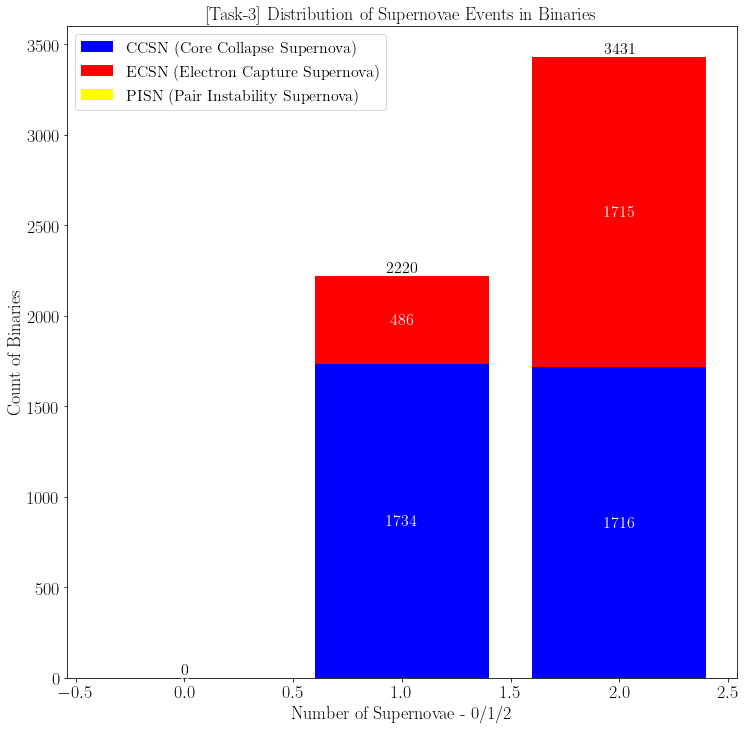

In [8]:
# plot - SN number and type (CCSN or ECSN)
fig, ax = plt.subplots(figsize=(12, 12))
num_sn = [0,1,2]#[sn_events['Zero SN'],sn_events['One SN'],sn_events['Two SN']]
""" ax.bar(num_sn, sn_st['CCSN'], label='CCSN (Core Collapse Supernova)', color='blue')
ax.bar(num_sn, sn_st['PISN'],middle=, label='PISN (Pair Instability Supernova)', color='yellow')
ax.bar(num_sn, sn_st['ECSN'], bottom=sn_st['CCSN'], label='ECSN (Electron Capture Supernova)', color='red')
 """
ax.bar(num_sn, sn_st['CCSN'], label='CCSN (Core Collapse Supernova)', color='blue')
ax.bar(num_sn, sn_st['ECSN'], bottom=sn_st['CCSN'], label='ECSN (Electron Capture Supernova)', color='red')
ax.bar(num_sn, sn_st['PISN'], bottom=np.add(sn_st['CCSN'], sn_st['ECSN']), label='PISN (Pair Instability Supernova)', color='yellow')
""" df = pd.DataFrame(sn_st)
df.plot() """
# Add labels and title
ax.set_xlabel('Number of Supernovae - 0/1/2')
ax.set_ylabel('Count of Binaries')
ax.set_title('[Task-3] Distribution of Supernovae Events in Binaries')
total_counts = np.add(np.array(sn_st['CCSN']),np.array(sn_st['ECSN'])) # type: ignore
for i in range(len(num_sn)):
    # CCSN annotation
    ax.text(num_sn[i], sn_st['CCSN'][i] / 2, str(sn_st['CCSN'][i]), ha='center', va='center', color='white')
    # ECSN annotation
    ax.text(num_sn[i], sn_st['CCSN'][i] + sn_st['ECSN'][i] / 2, str(sn_st['ECSN'][i]), ha='center', va='center', color='white')
    # Total annotation
    ax.text(num_sn[i], total_counts[i] + 5, str(total_counts[i]), ha='center', va='bottom')

#bar_width = 0.2
# Add legend
ax.legend()

# Show plot
fig.savefig('./Task-3/SN-CCSN and ECSN by 0,1,2 SN.jpeg',dpi=300)

fig.savefig('/home/rsgr/lukog/plots/task3/SN-CCSN and ECSN by 0,1,2 SN.jpeg',dpi=300)

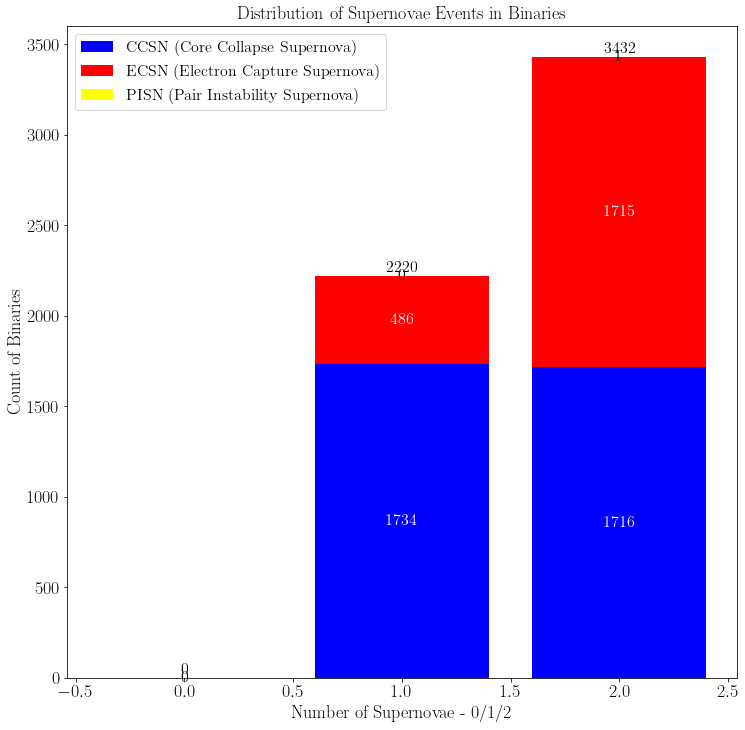

In [9]:
import matplotlib.pyplot as plt
import numpy as np

sn_st = {'CCSN': [0, 1734, 1716], 'ECSN': [0, 486, 1715], 'PISN': [0, 0, 1]}
num_sn = [0, 1, 2]

# Initialize the figure and axis
fig, ax = plt.subplots(figsize=(12, 12))

# Plot the bar chart with stacking
ax.bar(num_sn, sn_st['CCSN'], label='CCSN (Core Collapse Supernova)', color='blue')
ax.bar(num_sn, sn_st['ECSN'], bottom=sn_st['CCSN'], label='ECSN (Electron Capture Supernova)', color='red')
ax.bar(num_sn, sn_st['PISN'], bottom=np.add(sn_st['CCSN'], sn_st['ECSN']), label='PISN (Pair Instability Supernova)', color='yellow')

# Add labels and title
ax.set_xlabel('Number of Supernovae - 0/1/2')
ax.set_ylabel('Count of Binaries')
ax.set_title('Distribution of Supernovae Events in Binaries')

# Calculate total counts for annotations
total_counts = np.add(np.add(np.array(sn_st['CCSN']), np.array(sn_st['ECSN'])), np.array(sn_st['PISN']))

# Add annotations
for i in range(len(num_sn)):
    # CCSN annotation
    ax.text(num_sn[i], sn_st['CCSN'][i] / 2, str(sn_st['CCSN'][i]), ha='center', va='center', color='white')
    # ECSN annotation
    ax.text(num_sn[i], sn_st['CCSN'][i] + sn_st['ECSN'][i] / 2, str(sn_st['ECSN'][i]), ha='center', va='center', color='white')
    # PISN annotation
    ax.text(num_sn[i], total_counts[i] - sn_st['PISN'][i] / 2, str(sn_st['PISN'][i]), ha='center', va='center', color='black')
    # Total annotation
    ax.text(num_sn[i], total_counts[i] + 5, str(total_counts[i]), ha='center', va='bottom')

# Add legend
ax.legend()

# Show plot
plt.show()

# Save the figure
fig.savefig('./Task-3/SN-CCSN and ECSN by 0,1,2 SN.jpeg', dpi=300)
fig.savefig('/home/rsgr/lukog/plots/task3/SN-CCSN and ECSN by 0,1,2 SN.jpeg', dpi=300)


*Explanation for the above code:*

https://compas.readthedocs.io/en/latest/pages/ User%20guide/Post-processing/CHE_paper_tutorial/CHE_evolution_demo_ANSWERS.html <br> <br> *This is the source for the seed_ce and seed_sn*

In [11]:
seed_ce=data3['BSE_Common_Envelopes']['SEED'][...].squeeze()
print('Total no. of binaries that undergo common envelope evolution: {} out of 10,000'.format(len(seed_ce)))
print('Fraction = ',(len(seed_ce)/10**4))
seeds = data3['BSE_System_Parameters']['SEED'][()]
print(1718628407 in seed_ce)

    


Total no. of binaries that undergo common envelope evolution: 5381 out of 10,000
Fraction =  0.5381
False


In [9]:
printCompasDetails(data3['BSE_System_Parameters'])

SEED,(units),1718633719,1718633720,1718633721,1718633722,1718633723,1718633724,1718633725,1718633726,1718633727,...,1718643709,1718643710,1718643711,1718643712,1718643713,1718643714,1718643715,1718643716,1718643717,1718643718
CH_on_MS(1),State,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
CH_on_MS(2),State,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Eccentricity@ZAMS,-,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Equilibrated_At_Birth,Event,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Error,-,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Evolution_Status,-,3.000000,3.000000,12.000000,14.000000,17.000000,11.000000,17.000000,3.000000,12.000000,...,12.000000,12.000000,12.000000,3.000000,17.000000,17.000000,12.000000,3.000000,12.000000,12.000000
Mass@ZAMS(1),Msol,8.590384,9.931313,24.270213,50.133355,16.486113,5.277764,16.333234,11.898321,5.131225,...,14.598920,6.637648,36.791965,30.156180,11.399139,17.625339,5.173728,9.721350,5.131538,6.240794
Mass@ZAMS(2),Msol,7.232343,7.444495,15.663457,46.797043,9.095011,3.743610,14.367442,1.137210,4.153766,...,9.040620,3.004070,11.297844,6.898416,8.141162,7.231896,3.800263,5.667774,1.682811,1.363086
Merger,Event,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000
Merger_At_Birth,Event,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [7]:
seeds = syspar['SEED'][()]
mergers = syspar['Evolution_Status'][()]
totalmergers = (mergers == 12).sum()
sma_merger = []
mass_zams1_merger,mass_zams2_merger = np.array([]),np.array([])
for i in range(len(seeds)):
    if list(mergers)[i] == 12:
        mass_zams1_merger = np.append(mass_zams1_merger,mass1[i])
        mass_zams2_merger = np.append(mass_zams2_merger,mass2[i])
        sma_merger.append(sma[i])
print(totalmergers)
print(len(sma_merger))

print(len(mass_zams1_merger))

3569
3569
3569


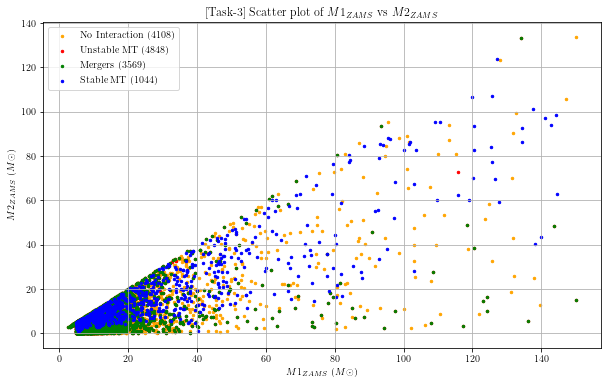

In [15]:
# plot 1 : M1(ZAMS) vs M2(ZAMS) for stable, unsatble, mergers and no-interactions
plt.scatter(mass_zams1_nointer, mass_zams2_nointer, c='orange', label=f'No Interaction ({binary_no_interaction})',s=6)
plt.scatter(mass_zams1_unstable, mass_zams2_unstable, c='red', label=f'Unstable MT ({bill_unstable})',s=6)

plt.scatter(mass_zams1_merger, mass_zams2_merger, c='green', label=f'Mergers ({totalmergers})',s=6)
plt.scatter(mass_zams1_stable, mass_zams2_stable, c='blue', label=f'Stable MT ({bill_stable})',s=6)

plt.xlabel('$M1_{ZAMS}$ ($M_\odot$)')
plt.ylabel('$M2_{ZAMS}$ ($M_\odot$)')
plt.title('[Task-3]   Scatter plot of $M1_{ZAMS}$ vs $M2_{ZAMS}$')
plt.legend()
plt.grid(True)
plt.savefig('./Task-3/M1_vs_M2_ZAMS.jpeg', dpi = 300)
plt.show()

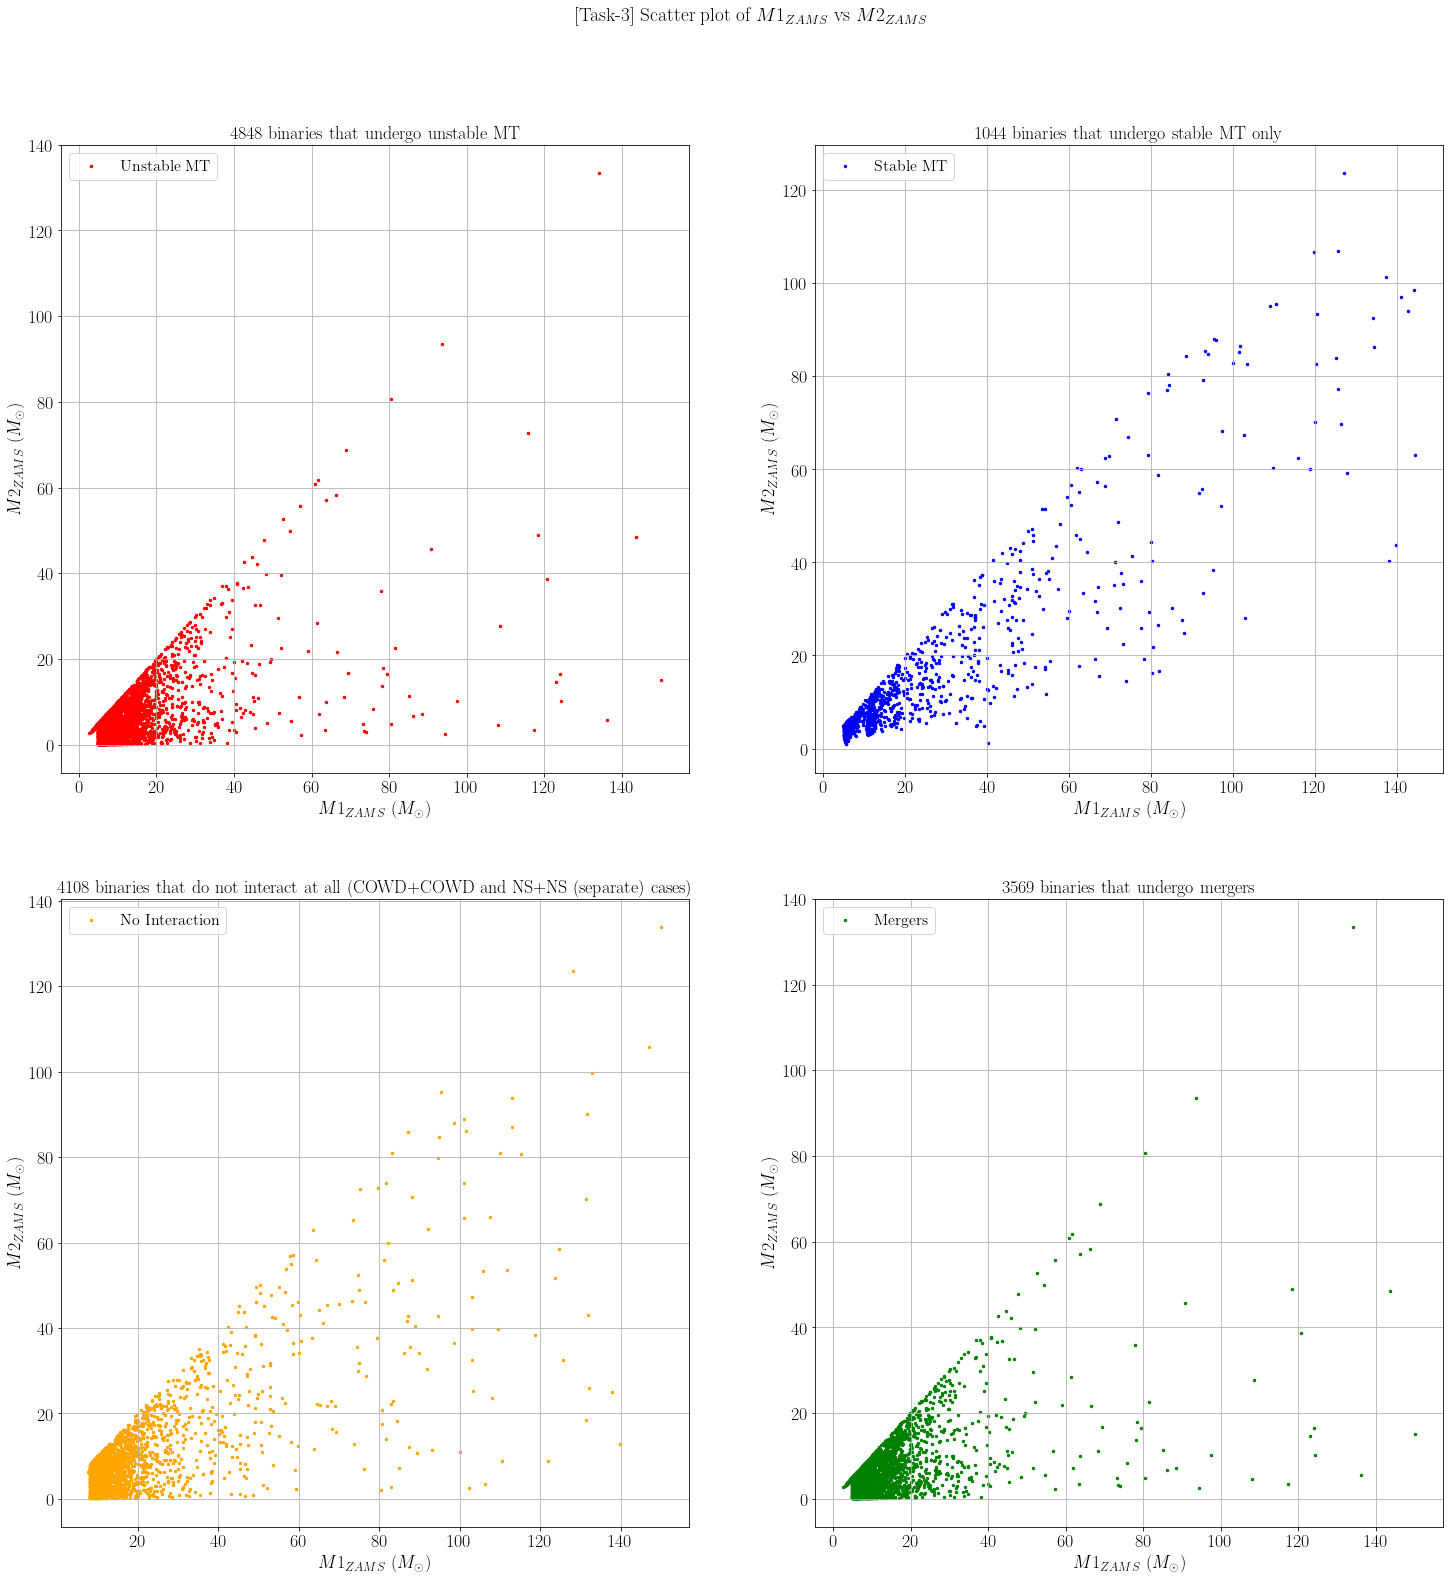

In [11]:
# plot 2 : Sub-plots for M1(ZAMS) vs M2(ZAMS) for stable, unsatble, mergers and no-interactions
fig, axs = plt.subplots(2, 2, figsize=(24, 24))
axs[0,0].scatter(mass_zams1_unstable, mass_zams2_unstable, c='red', label='Unstable MT',s=6)
axs[0,0].set_xlabel('$M1_{ZAMS}$ ($M_\odot$)')
axs[0,0].set_ylabel('$M2_{ZAMS}$ ($M_\odot$)')
axs[0,0].legend()
axs[0,0].set_title(f'{bill_unstable} binaries that undergo unstable MT')

axs[0,0].grid(True)

axs[0,1].scatter(mass_zams1_stable, mass_zams2_stable, c='blue', label='Stable MT',s=6)
axs[0,1].set_xlabel('$M1_{ZAMS}$ ($M_\odot$)')
axs[0,1].set_ylabel('$M2_{ZAMS}$ ($M_\odot$)')
axs[0,1].set_title(f'{bill_stable} binaries that undergo stable MT only')
axs[0,1].legend()

axs[0,1].grid(True)

axs[1,0].scatter(mass_zams1_nointer, mass_zams2_nointer, c='orange', label='No Interaction',s=6)
axs[1,0].set_xlabel('$M1_{ZAMS}$ ($M_\odot$)')
axs[1,0].set_ylabel('$M2_{ZAMS}$ ($M_\odot$)')
axs[1,0].set_title(f'{binary_no_interaction} binaries that do not interact at all (COWD+COWD and NS+NS (separate) cases)')
axs[1,0].legend()

axs[1,0].grid(True)

axs[1,1].scatter(mass_zams1_merger, mass_zams2_merger, c='green', label='Mergers',s=6)
axs[1,1].set_xlabel('$M1_{ZAMS}$ ($M_\odot$)')
axs[1,1].set_ylabel('$M2_{ZAMS}$ ($M_\odot$)')
axs[1,1].set_title(f'{totalmergers} binaries that undergo mergers')
axs[1,1].legend()

axs[1,1].grid(True)

plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)
fig.suptitle('[Task-3]   Scatter plot of $M1_{ZAMS}$ vs $M2_{ZAMS}$')

fig.savefig('./Task-3/M1_vs_M2_ZAMS_subplots.jpeg', dpi = 300)

fig.savefig('/home/rsgr/lukog/plots/task3/M1_vs_M2_ZAMS_subplots.jpeg', dpi = 300)
plt.show()

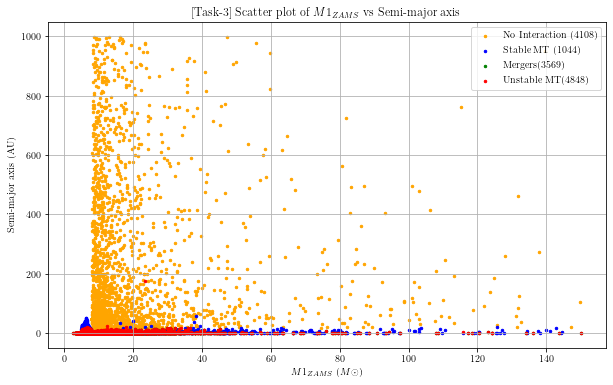

In [17]:
# plot 3 : M1(ZAMS) vs Semi-major axis for stable, unsatble, mergers and no-interactions
#fig, axs = plt.subplots(2, 2, figsize=(24, 12))
plt.scatter(mass_zams1_nointer, sma_nointer, c='orange', label=f'No Interaction ({binary_no_interaction})',s=6)


plt.scatter(mass_zams1_stable, sma_stable, c='blue', label=f'Stable MT ({bill_stable})',s=6)

plt.scatter(mass_zams1_merger, sma_merger, c='green', label=f'Mergers({totalmergers})',s=6)
plt.scatter(mass_zams1_unstable, sma_unstable, c='red', label=f'Unstable MT({bill_unstable})',s=6)
plt.xlabel('$M1_{ZAMS}$ ($M_\odot$)')
plt.ylabel('Semi-major axis (AU)')
plt.title('[Task-3]   Scatter plot of $M1_{ZAMS}$ vs Semi-major axis')
plt.legend()
plt.grid(True)
plt.savefig('./Task-3/M1_vs_SMA.jpeg', dpi = 300)
plt.show()

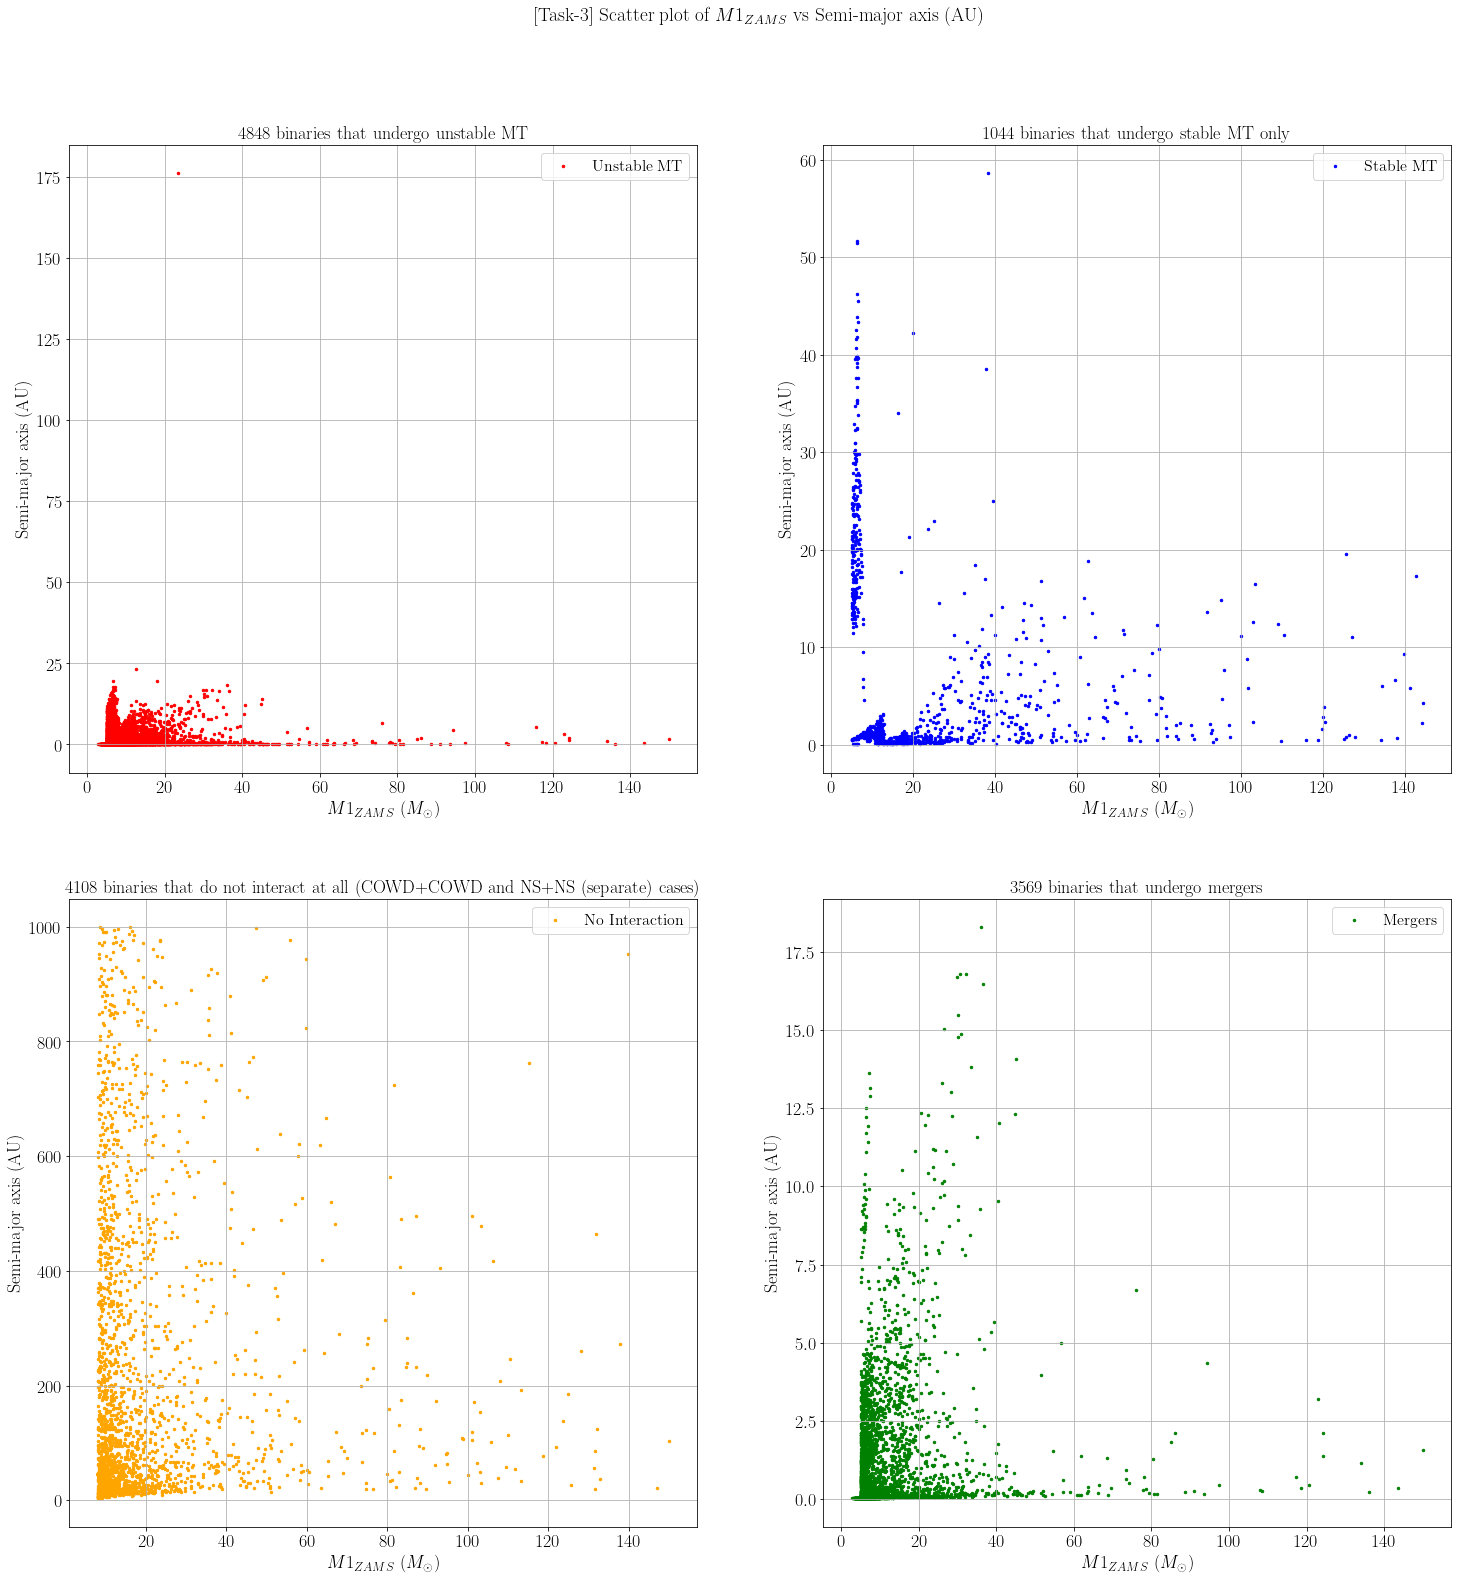

In [10]:
# plot 4 : Sub-plots for M1(ZAMS) vs SMA for stable, unsatble, mergers and no-interactions
fig, axs = plt.subplots(2,2, figsize=(24, 24))
axs[0,0].scatter(mass_zams1_unstable, sma_unstable, c='red', label='Unstable MT',s=6)
axs[0,0].set_xlabel('$M1_{ZAMS}$ ($M_\odot$)')
axs[0,0].set_ylabel('Semi-major axis (AU)')
axs[0,0].legend()
axs[0,0].set_title(f'{bill_unstable} binaries that undergo unstable MT')
axs[0,0].grid(True)

axs[0,1].scatter(mass_zams1_stable, sma_stable, c='blue', label='Stable MT',s=6)
axs[0,1].set_xlabel('$M1_{ZAMS}$ ($M_\odot$)')
axs[0,1].set_ylabel('Semi-major axis (AU)')
axs[0,1].legend()
axs[0,1].set_title(f'{bill_stable} binaries that undergo stable MT only')

axs[0,1].grid(True)

axs[1,0].scatter(mass_zams1_nointer, sma_nointer, c='orange', label='No Interaction',s=6)
axs[1,0].set_xlabel('$M1_{ZAMS}$ ($M_\odot$)')
axs[1,0].set_ylabel('Semi-major axis (AU)')
axs[1,0].set_title(f'{binary_no_interaction} binaries that do not interact at all (COWD+COWD and NS+NS (separate) cases)')
axs[1,0].legend()

axs[1,0].grid(True)

axs[1,1].scatter(mass_zams1_merger, sma_merger, c='green', label='Mergers',s=6)
axs[1,1].set_xlabel('$M1_{ZAMS}$ ($M_\odot$)')
axs[1,1].set_ylabel('Semi-major axis (AU)')
axs[1,1].set_title(f'{totalmergers} binaries that undergo mergers')
axs[1,1].legend()

axs[1,1].grid(True)

plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)
fig.suptitle('[Task-3]   Scatter plot of $M1_{ZAMS}$ vs Semi-major axis (AU)')

fig.savefig('./Task-3/M1_vs_SMA_subplots.jpeg', dpi = 300)

fig.savefig('/home/rsgr/lukog/plots/task3/M1_vs_SMA_subplots.jpeg', dpi = 300)
plt.show()

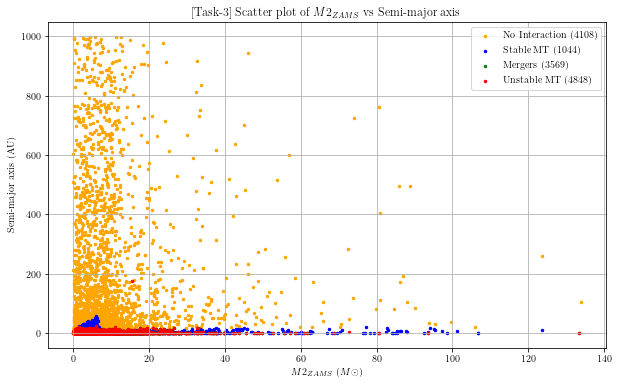

In [19]:
# plot 5 : M2(ZAMS) vs Semi-major axis for stable, unsatble, mergers and no-interactions
#fig, axs = plt.subplots(2, 2, figsize=(24, 12))
plt.scatter(mass_zams2_nointer, sma_nointer, c='orange', label=f'No Interaction ({binary_no_interaction})',s=6)


plt.scatter(mass_zams2_stable, sma_stable, c='blue', label=f'Stable MT ({bill_stable})',s=6)

plt.scatter(mass_zams2_merger, sma_merger, c='green', label=f'Mergers ({totalmergers})',s=6)
plt.scatter(mass_zams2_unstable, sma_unstable, c='red', label=f'Unstable MT ({bill_unstable})',s=6)
plt.xlabel('$M2_{ZAMS}$ ($M_\odot$)')
plt.ylabel('Semi-major axis (AU)')
plt.title('[Task-3]         Scatter plot of $M2_{ZAMS}$ vs Semi-major axis')
plt.legend()
plt.grid(True)
plt.savefig('./Task-3/M2_vs_SMA.jpeg', dpi = 300)
plt.show()

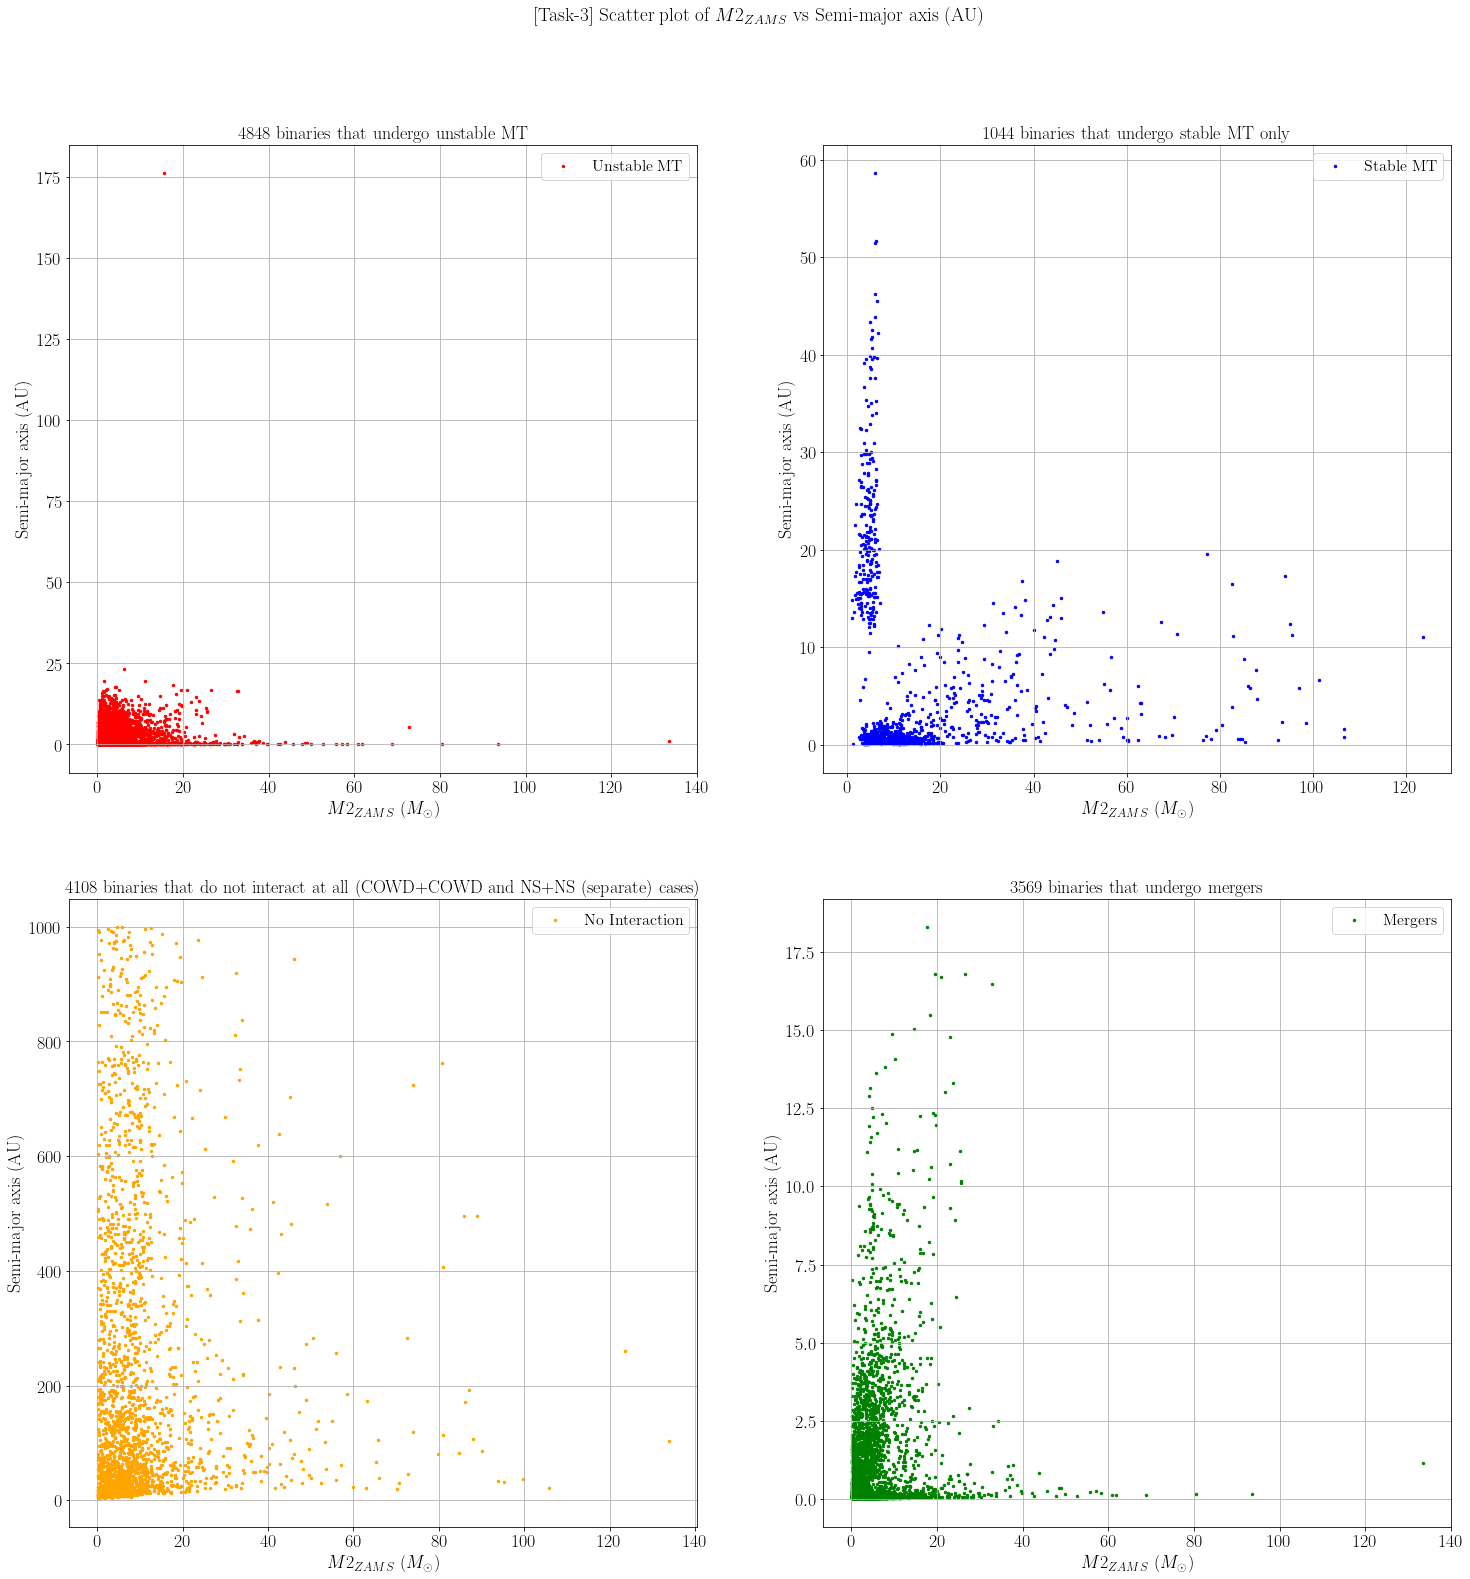

: 

In [12]:
# plot 6 : Sub-plots for M1(ZAMS) vs SMA for stable, unsatble, mergers and no-interactions
fig, axs = plt.subplots(2,2, figsize=(24, 24))
axs[0,0].scatter(mass_zams2_unstable, sma_unstable, c='red', label='Unstable MT',s=6)
axs[0,0].set_xlabel('$M2_{ZAMS}$ ($M_\odot$)')
axs[0,0].set_ylabel('Semi-major axis (AU)')
axs[0,0].set_title(f'{bill_unstable} binaries that undergo unstable MT')
axs[0,0].legend()

axs[0,0].grid(True)

axs[0,1].scatter(mass_zams2_stable, sma_stable, c='blue', label='Stable MT',s=6)
axs[0,1].set_xlabel('$M2_{ZAMS}$ ($M_\odot$)')
axs[0,1].set_ylabel('Semi-major axis (AU)')
axs[0,1].set_title(f'{bill_stable} binaries that undergo stable MT only')
axs[0,1].legend()

axs[0,1].grid(True)

axs[1,0].scatter(mass_zams2_nointer, sma_nointer, c='orange', label='No Interaction',s=6)
axs[1,0].set_xlabel('$M2_{ZAMS}$ ($M_\odot$)')
axs[1,0].set_ylabel('Semi-major axis (AU)')
axs[1,0].legend()
axs[1,0].set_title(f'{binary_no_interaction} binaries that do not interact at all (COWD+COWD and NS+NS (separate) cases)')
axs[1,0].grid(True)

axs[1,1].scatter(mass_zams2_merger, sma_merger, c='green', label='Mergers',s=6)
axs[1,1].set_xlabel('$M2_{ZAMS}$ ($M_\odot$)')
axs[1,1].set_ylabel('Semi-major axis (AU)')
axs[1,1].set_title(f'{totalmergers} binaries that undergo mergers')
axs[1,1].legend()

axs[1,1].grid(True)

plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)
fig.suptitle('[Task-3]   Scatter plot of $M2_{ZAMS}$ vs Semi-major axis (AU)')

fig.savefig('./Task-3/M2_vs_SMA_subplots.jpeg', dpi = 300)
fig.savefig('/home/rsgr/lukog/plots/task3/M2_vs_SMA_subplots.jpeg', dpi = 300)

plt.show()